# Title: Patient-Centric Medicine Planner with Machine Learning

# Description:

Welcome to our cutting-edge Personalized Medical Recommendation System, a powerful platform designed to assist users in understanding and managing their health. Leveraging the capabilities of machine learning, our system analyzes user-input symptoms to predict potential diseases accurately.

# load dataset & tools

In [1]:
import  pandas as pd

In [2]:
dataset = pd.read_csv("datasets\Training.csv")

In [5]:
dataset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [28]:
# vals = dataset.values.flatten()

In [4]:
dataset.shape

(4920, 133)

# train test split

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [9]:
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

# ecoding prognonsis
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
print(Y)

[15 15 15 ... 38 35 27]


In [11]:
Y.shape

(4920,)

In [12]:
print(X_test.shape)
print(y_test.shape)

(984, 132)
(984,)


In [ ]:
# Checking the no.of classes
num_classes = dataset['prognosis'].nunique()
print(f"Number of classifications: {num_classes}")


Number of classifications: 41


# Training top models

In [20]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np


# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='rbf',gamma=0.01,C=0.2),
    'RandomForest': RandomForestClassifier(n_estimators=20, max_depth=5, random_state=84),
}

# Loop through the models, train, test, and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))
    print("\n" + "="*43 + "\n")


SVC Accuracy: 0.9989837398373984
SVC Confusion Matrix:
[[18,  0,  0, ...,  0,  0,  0],
 [ 0, 30,  0, ...,  0,  0,  0],
 [ 0,  0, 24, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 26,  0,  0],
 [ 0,  0,  0, ...,  0, 22,  0],
 [ 0,  0,  0, ...,  0,  0, 33]]


RandomForest Accuracy: 0.774390243902439
RandomForest Confusion Matrix:
[[16,  0,  0, ...,  0,  0,  0],
 [ 0,  0,  0, ...,  0,  0,  0],
 [ 0,  0,  0, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 26,  0,  0],
 [ 0,  0,  0, ...,  0, 22,  0],
 [ 0,  0,  0, ...,  0,  0, 32]]




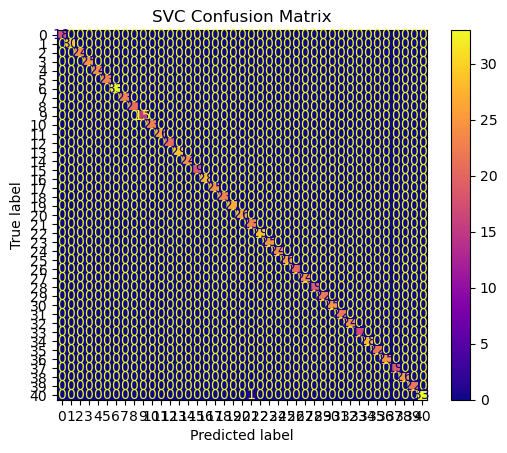

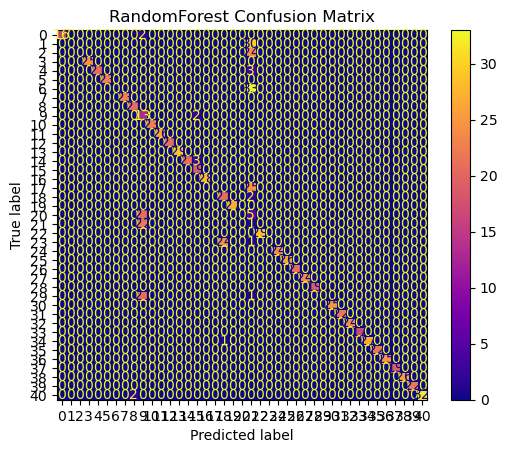

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example: After model predictions
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    
    # Display the confusion matrix with a colorful heatmap
    #plt.figure(figsize=(50,20))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='plasma')  # You can use other colormaps like 'plasma', 'coolwarm', etc.
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()


# single prediction

In [24]:
# selecting svc
svc = SVC(kernel='rbf',gamma=0.01,C=0.2)
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test,ypred)

0.9989837398373984

In [25]:
# save svc
import pickle
pickle.dump(svc,open('svc.pkl','wb'))

In [26]:
# load model
svc = pickle.load(open('svc.pkl','rb'))

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
# test 1:
print("predicted disease :",svc.predict(X_test.iloc[50].values.reshape(1,-1)))
print("Actual Disease :", y_test[50])

predicted disease : [18]
Actual Disease : 18


In [29]:
# Get the last index for iloc in X_test
last_index = X_test.shape[0] - 1
print("The last valid index for iloc is:", last_index)

The last valid index for iloc is: 983


# Recommendation System and Prediction

# load database and use logic for recommendations

In [30]:
sym_des = pd.read_csv("datasets/symtoms_df.csv")
precautions = pd.read_csv("datasets/precautions_df.csv")
workout = pd.read_csv("datasets/workout_df.csv")
description = pd.read_csv("datasets/description.csv")
medications = pd.read_csv('datasets/medications.csv')
diets = pd.read_csv("datasets/diets.csv")

In [31]:
#============================================================
# custome and helping functions
#==========================helper funtions================
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
##def get_predicted_value(patient_symptoms):
    ##input_vector = np.zeros(len(symptoms_dict))
    ##for item in patient_symptoms:
        #changes
        #if(item in symptoms_dict.keys()):
        ##input_vector[symptoms_dict[item]] = 1
    #print(input_vector.sum())
    #return diseases_list[svc.predict([input_vector])[0]]
    ##return diseases_list[svc.predict([input_vector])[0]]

    

In [32]:
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    
    # Check for unknown symptoms
    valid_symptoms = [symptom for symptom in patient_symptoms if symptom in symptoms_dict]
    
    if not valid_symptoms:  # If no valid symptoms are entered, classify as "Healthy"
        return "Healthy Person"
    
    # Populate input vector based on valid symptoms
    for symptom in valid_symptoms:
        input_vector[symptoms_dict[symptom]] = 1
    
    # Predict the disease
    predicted_index = svc.predict([input_vector])[0]
    return diseases_list.get(predicted_index, "Healthy Person")  # Default to "Healthy Person" if prediction is out of bounds

# Test 1: User enters symptoms
symptoms = input("Enter your symptoms (comma-separated): ")
user_symptoms = [s.strip() for s in symptoms.split(',')]
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]  # Clean up any extra characters

# Predict the disease or classify as healthy
predicted_disease = get_predicted_value(user_symptoms)

if predicted_disease == "Healthy Person":
    print("Based on your symptoms, you are a Healthy Person.")
else:
    desc, pre, med, die, wrkout = helper(predicted_disease)
    print("================= Predicted Disease ==============")
    print(predicted_disease)
    print("================= Description ====================")
    print(desc)
    print("================= Precautions ====================")
    for i, p in enumerate(pre[0], start=1):
        print(f"{i}: {p}")
    print("================= Medications ====================")
    for i, m in enumerate(med, start=1):
        print(f"{i}: {m}")
    print("================= Diet Recommendations ===========")
    for i, d in enumerate(die, start=1):
        print(f"{i}: {d}")
    print("================= Workout Suggestions ============")
    for i, w in enumerate(wrkout, start=1):
        print(f"{i}: {w}")


Enter your symptoms (comma-separated):  itching


================= Predicted Disease ==============
Fungal infection
================= Description ====================
Fungal infection is a common skin condition caused by fungi.
================= Precautions ====================
1: bath twice
2: use detol or neem in bathing water
3: keep infected area dry
4: use clean cloths
================= Medications ====================
1: ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
================= Diet Recommendations ===========
1: ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']
================= Workout Suggestions ============
1: Avoid sugary foods
2: Consume probiotics
3: Increase intake of garlic
4: Include yogurt in diet
5: Limit processed foods
6: Stay hydrated
7: Consume green tea
8: Eat foods rich in zinc
9: Include turmeric in diet
10: Eat fruits and vegetables


In [33]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


Enter your symptoms....... dehydration


=================predicted disease============
Gastroenteritis
=================description==================
Gastroenteritis is an inflammation of the stomach and intestines, typically caused by a virus or bacteria.
=================precautions==================
1 :  stop eating solid food for while
2 :  try taking small sips of water
3 :  rest
4 :  ease back into eating
=================medications==================
5 :  ['Antibiotics', 'Antiemetic drugs', 'Antidiarrheal drugs', 'IV fluids', 'Probiotics']
=================workout==================
6 :  Stay hydrated
7 :  Consume clear fluids
8 :  Follow the BRAT diet (bananas, rice, applesauce, toast)
9 :  Include bland foods
10 :  Avoid fatty and greasy foods
11 :  Limit caffeine and alcohol
12 :  Avoid spicy foods
13 :  Consult a healthcare professional
14 :  Gradually reintroduce solid foods
15 :  Avoid dairy products
=================diets==================
16 :  ['Bland Diet', 'Bananas', 'Rice', 'Applesauce', 'Toast']


In [22]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


Enter your symptoms....... skin_rash


=================predicted disease============
Fungal infection
=================description==================
Fungal infection is a common skin condition caused by fungi.
=================precautions==================
1 :  bath twice
2 :  use detol or neem in bathing water
3 :  keep infected area dry
4 :  use clean cloths
=================medications==================
5 :  ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
=================workout==================
6 :  Avoid sugary foods
7 :  Consume probiotics
8 :  Increase intake of garlic
9 :  Include yogurt in diet
10 :  Limit processed foods
11 :  Stay hydrated
12 :  Consume green tea
13 :  Eat foods rich in zinc
14 :  Include turmeric in diet
15 :  Eat fruits and vegetables
=================diets==================
16 :  ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']


In [23]:
# let's use pycharm flask app
# but install this version in pycharm
import sklearn
print(sklearn.__version__)

1.2.2
